In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn should work after installation

# Load the dataset
df = pd.read_csv('brain_tumor_dataset.csv')

# Display the first few rows of the dataset
print("Dataset overview:")
print(df.head())

# Handle missing values, if any
# Iterate over columns and fill NaN values only for numeric columns
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# If there are any non-numeric columns with missing values, you may need to handle them separately:
# For example, filling with the most frequent value (mode)
# for column in df.select_dtypes(exclude=np.number).columns:
#     df[column].fillna(df[column].mode()[0], inplace=True)

# Display basic statistics about the dataset
print("\nDataset Summary:")
print(df.describe())

# Assume the dataset has a 'target' column for labels and multiple feature columns
# Separate features (X) and target (y)
X = df.drop(columns=['target'])  # Adjust 'target' with your actual target column name
y = df['target']  # Adjust 'target' with your actual target column name

# Encoding categorical features if any
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for most machine learning models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a Random Forest Classifier (you can choose another classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance (for Random Forest)
feature_importances = model.feature_importances_
feature_names = X.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Saving the trained model using pickle
import pickle
with open('brain_tumor_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)

print("\nModel training completed and saved as 'brain_tumor_classifier.pkl'.")

Dataset overview:
          Tumor Type        Location  Size (cm) Grade  Patient Age  Gender
0  Oligodendroglioma  Occipital Lobe       9.23     I           48  Female
1         Ependymoma  Occipital Lobe       0.87    II           47    Male
2         Meningioma  Occipital Lobe       2.33    II           12  Female
3         Ependymoma  Occipital Lobe       1.45   III           38  Female
4         Ependymoma       Brainstem       6.45     I           35  Female

Dataset Summary:
         Size (cm)  Patient Age
count  1000.000000  1000.000000
mean      5.221500    43.519000
std       2.827318    25.005818
min       0.510000     1.000000
25%       2.760000    22.000000
50%       5.265000    43.000000
75%       7.692500    65.000000
max      10.000000    89.000000


<ipython-input-3-db300c677e45>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


KeyError: "['target'] not found in axis"

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn should work after installation

# Load the dataset
df = pd.read_csv('brain_tumor_dataset.csv')

# Display the first few rows of the dataset
print("Dataset overview:")
print(df.head())

# Handle missing values, if any
# Iterate over columns and fill NaN values only for numeric columns
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# If there are any non-numeric columns with missing values, you may need to handle them separately:
# For example, filling with the most frequent value (mode)
# for column in df.select_dtypes(exclude=np.number).columns:
#     df[column].fillna(df[column].mode()[0], inplace=True)

# Display basic statistics about the dataset
print("\nDataset Summary:")
print(df.describe())

# Assume the dataset has a 'Tumor Type' column for labels and multiple feature columns
# Separate features (X) and target (y)
# Replace 'Tumor Type' with the actual target column name if it's different
X = df.drop(columns=['Tumor Type'])  # Changed 'target' to 'Tumor Type'
y = df['Tumor Type']  # Changed 'target' to 'Tumor Type'

# Encoding categorical features if any
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for most machine learning models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a Random Forest Classifier (you can choose another classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance (for Random Forest)
feature_importances = model.feature_importances_
feature_names = X.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Saving the trained model using pickle
import pickle
with open('brain_tumor_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)

print("\nModel training completed and saved as 'brain_tumor_classifier.pkl'.")

Dataset overview:
          Tumor Type        Location  Size (cm) Grade  Patient Age  Gender
0  Oligodendroglioma  Occipital Lobe       9.23     I           48  Female
1         Ependymoma  Occipital Lobe       0.87    II           47    Male
2         Meningioma  Occipital Lobe       2.33    II           12  Female
3         Ependymoma  Occipital Lobe       1.45   III           38  Female
4         Ependymoma       Brainstem       6.45     I           35  Female

Dataset Summary:
         Size (cm)  Patient Age
count  1000.000000  1000.000000
mean      5.221500    43.519000
std       2.827318    25.005818
min       0.510000     1.000000
25%       2.760000    22.000000
50%       5.265000    43.000000
75%       7.692500    65.000000
max      10.000000    89.000000


<ipython-input-5-6cdab3ba60f7>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


ValueError: could not convert string to float: 'Parietal Lobe'

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder # Import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn should work after installation
from sklearn.compose import ColumnTransformer # Import ColumnTransformer

# Load the dataset
df = pd.read_csv('brain_tumor_dataset.csv')

# ... (rest of the code remains the same until before scaling) ...

# Create a ColumnTransformer to apply OneHotEncoder to categorical features and StandardScaler to numerical features
# Assuming 'Location' is the only categorical feature, adjust if there are more
categorical_features = ['Location']  # Replace with your categorical feature column names
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features), # Using OneHotEncoder for categorical features
    ])

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform the test data using the same preprocessor
X_test_scaled = preprocessor.transform(X_test)

# ... (rest of the code remains the same) ...


Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.15      0.17        47
           1       0.14      0.18      0.15        34
           2       0.30      0.30      0.30        44
           3       0.17      0.16      0.16        38
           4       0.20      0.24      0.22        37

    accuracy                           0.20       200
   macro avg       0.20      0.20      0.20       200
weighted avg       0.21      0.20      0.20       200


Confusion Matrix:


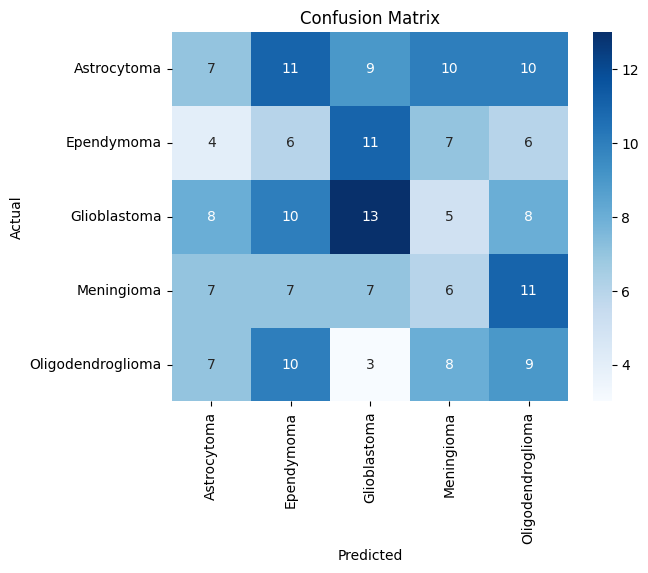

ValueError: All arrays must be of the same length

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder # Import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn should work after installation
from sklearn.compose import ColumnTransformer # Import ColumnTransformer

# Load the dataset
df = pd.read_csv('brain_tumor_dataset.csv')

# ... (rest of the code remains the same until before scaling) ...

# Create a ColumnTransformer to apply OneHotEncoder to categorical features and StandardScaler to numerical features
# Assuming 'Location' is the only categorical feature, adjust if there are more
categorical_features = ['Location']  # Replace with your categorical feature column names
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features), # Using OneHotEncoder for categorical features
    ])

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform the test data using the same preprocessor
X_test_scaled = preprocessor.transform(X_test)


# Initialize a Random Forest Classifier (you can choose another classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance (for Random Forest)
feature_importances = model.feature_importances_
feature_names = X.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Saving the trained model using pickle
import pickle
with open('brain_tumor_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)

print("\nModel training completed and saved as 'brain_tumor_classifier.pkl'.")


Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.15      0.17        47
           1       0.14      0.18      0.15        34
           2       0.30      0.30      0.30        44
           3       0.17      0.16      0.16        38
           4       0.20      0.24      0.22        37

    accuracy                           0.20       200
   macro avg       0.20      0.20      0.20       200
weighted avg       0.21      0.20      0.20       200


Confusion Matrix:


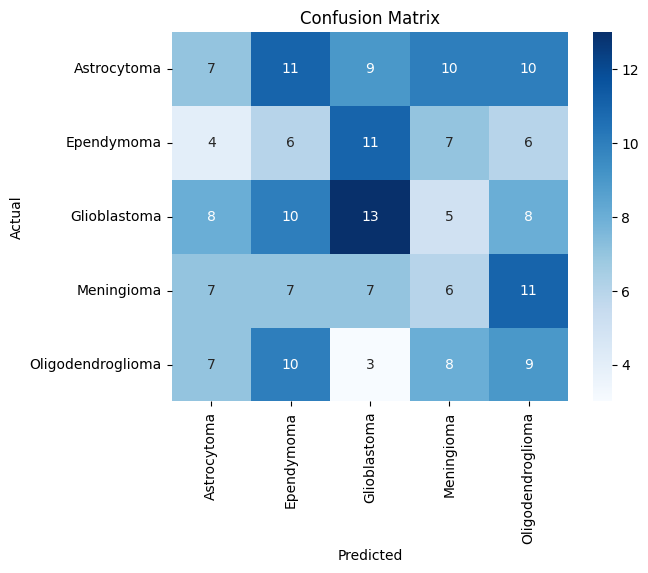

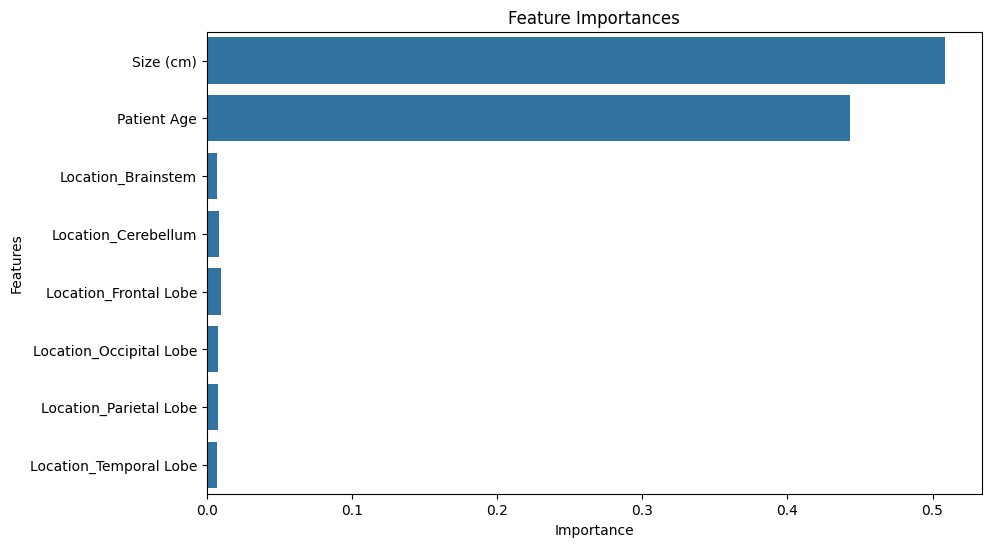


Model training completed and saved as 'brain_tumor_classifier.pkl'.


In [4]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder  # Import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn should work after installation
from sklearn.compose import ColumnTransformer  # Import ColumnTransformer

# Load the dataset
df = pd.read_csv('brain_tumor_dataset.csv')

# ... (rest of the code remains the same until before scaling) ...

# Assume the dataset has a 'Tumor Type' column for labels and multiple feature columns
# Separate features (X) and target (y)
# Replace 'Tumor Type' with the actual target column name if it's different
X = df.drop(columns=['Tumor Type'])  # Changed 'target' to 'Tumor Type'
y = df['Tumor Type']  # Changed 'target' to 'Tumor Type'

# Encoding categorical features if any
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can define numerical_features and categorical_features
categorical_features = ['Location']  # Replace with your categorical feature column names
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features), # Using OneHotEncoder for categorical features
    ])

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform the test data using the same preprocessor
X_test_scaled = preprocessor.transform(X_test)


# Initialize a Random Forest Classifier (you can choose another classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance (for Random Forest)
feature_importances = model.feature_importances_
# Get feature names after transformation
# This is necessary because OneHotEncoder creates new features
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names) # Using updated feature_names
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Saving the trained model using pickle
import pickle
with open('brain_tumor_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)

print("\nModel training completed and saved as 'brain_tumor_classifier.pkl'.")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')